# Homework 3 - Principal Component Regression
One goal of this homework is to strengthen our understanding of principal components. We do this by showing how linear regression works differently when the data is transformed from the standard basis into the basis given by PCA.
- make sure you have the music_scaled.csv file in your folder.

We load the `music_scaled.csv` dataset ([source](https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music#)). 
- The dataset contains a sample of traditional songs from different cultures. 
- Features F1 to F68 are quantitative summaries of the songs from audio analysis software. 
- These features have been subject to standard scaling. They are stored as predictors in `X.` 
- The latitudes of the countries from which the songs originate are stored as a target variable `y.`

In [1]:
import pandas as pd

data = pd.read_csv("music_scaled.csv")
y_series = data["Latitude"]
display(y_series)

0      -35.30
1      -35.30
2      -35.30
3      -35.30
4      -35.30
        ...  
1054    54.68
1055    54.68
1056    54.68
1057    54.68
1058    54.68
Name: Latitude, Length: 1059, dtype: float64

In [2]:
X_dframe = data.iloc[:,:68]
display(X_dframe)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F59,F60,F61,F62,F63,F64,F65,F66,F67,F68
0,-1.094000,-1.280592,2.806926,-0.097576,-0.791472,2.440896,0.003710,-0.864715,0.738257,-0.185613,...,0.465685,1.651588,0.169668,0.348005,-0.385988,-0.137105,-0.421766,-0.296043,-0.731677,-0.442480
1,-1.285544,-0.940198,-0.721321,-0.172044,-2.127893,2.549762,1.365750,0.489953,1.692462,0.387044,...,0.534732,-0.935377,-1.176909,-1.408592,-0.986426,-1.293346,-1.239692,-0.729675,-1.153275,-1.254825
2,0.503962,0.497136,-0.319168,0.330719,-0.398783,-0.749429,-2.380589,0.951098,-0.452177,-0.761333,...,0.274432,0.150854,0.161782,0.101072,-0.071694,-0.835381,-0.397305,-0.456676,-0.492329,-0.761836
3,-1.119978,0.696697,0.612882,-0.983295,1.333148,1.557607,-0.999593,-1.067051,0.811559,0.437626,...,0.696481,0.091214,-0.051819,0.219476,0.001850,-0.088704,-0.068108,-0.070306,0.277593,-0.071959
4,1.256214,1.066239,0.984965,-0.312513,-2.111077,0.009980,0.509741,0.837961,0.420966,0.366289,...,1.816629,0.593634,0.746647,0.035940,-0.292118,0.075086,-0.238434,-0.347040,-0.693764,0.053940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.089066,0.045324,-0.527161,0.274475,0.113220,-1.011250,-1.071873,-1.533993,-3.432258,-5.225601,...,0.269233,3.032646,3.000290,2.279520,3.409849,-0.028728,1.661721,3.501781,2.685491,1.111113
1055,0.558342,0.274368,-0.356357,-0.410656,0.710800,-0.240603,-0.370162,0.870655,-1.488764,0.566561,...,1.723216,3.048129,2.819643,1.571712,0.935972,0.406948,0.725402,-0.630365,1.991043,0.462783
1056,0.880180,0.668551,0.115084,-0.373637,0.848817,-0.859218,-0.823580,0.051974,-1.144327,1.314224,...,1.075571,3.199856,0.321025,0.897483,0.356881,1.262655,0.939693,-0.032762,0.801281,0.081143
1057,-0.990084,-1.094018,3.645894,-0.474362,-1.129270,0.188591,0.092048,0.252823,-0.377933,0.510161,...,4.246089,1.513936,1.893477,1.733179,0.707100,1.219381,-0.573497,-0.156859,-0.796013,-0.849146


# 1 Plain Linear Regression

(a) [2 pt] Perform linear regression of **y** on **X** using `sklearn.linear_model.LinearRegression` when the regressors consist of:
- F1 only; 
- F1 and F2 only; 
- F1, F2, and F3 only; 

$\qquad \qquad \vdots$

- F1, F2, F3, ..., and F66 only. 
- F1, F2, F3, ....., and F67 only. 
- F1, F2, F3, ........, and F68. 

Store the coefficients corresponding to **F1** as a vector of 68 elements $\texttt{F1\_coeff}$.

In [3]:
# TODO Perform linear regression
X, y = X_dframe.to_numpy(), y_series.to_numpy() # change to numpy for ease
import numpy as np
from sklearn.linear_model import LinearRegression
F1_coeff = np.zeros(68)
for i in range(1, 69):
    reg = LinearRegression().fit(X[:, :i], y)
    F1_coeff[i - 1] = reg.coef_[0]
print(F1_coeff)


[0.65973395 1.66992304 2.22215759 2.32442704 2.26829798 2.84523519
 3.33208702 3.35667894 3.26985677 3.30323164 3.29207706 3.32089036
 3.34753513 3.32681621 3.28589764 2.97362302 2.93320924 5.01951537
 6.36401571 4.99835492 6.36477817 4.13369465 4.73000709 4.98148878
 4.9301282  5.09309431 5.19847973 5.16332859 5.15766681 5.31294127
 5.27558489 5.2821778  5.30331315 4.93889988 4.75844919 3.92074136
 3.9790839  3.65511832 2.54600835 2.426859   2.21710891 2.31024922
 2.52889366 2.57728085 2.57968802 2.77791065 2.7783513  2.75093888
 2.62426328 2.6138197  2.80234033 2.73071506 5.26376217 6.42438
 8.82181176 9.16281181 8.98305474 8.98406978 8.61981963 8.96160707
 8.99198293 8.92392552 8.86472445 8.6973966  8.6365797  8.8964445
 8.45382033 8.30367097]


(b) [1 pt] For the four cases:
- F1 only; 
- F1 and F2 only; 
- F1, F2, F3, ....., and F67 only. 
- F1, F2, F3, ........, and F68. 

print the estimated coefficient for **F1**.

In [4]:
# TODO print coefficients for F1
print('F1 only', F1_coeff[0])
print('F1 and F2 only', F1_coeff[1]) 
print('F1 to F67', F1_coeff[-2]) 
print('F1 to F68', F1_coeff[-1])

F1 only 0.659733950012265
F1 and F2 only 1.669923041178091
F1 to F67 8.453820331646487
F1 to F68 8.303670971591442


 F1 Coeff(c) [1pt] Plot "Estimated F1 Coeff" (y-axis) against "Number of regressors" (x-axis). Show axis labels.

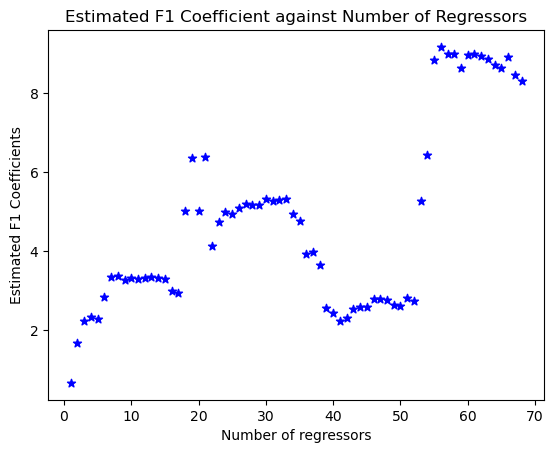

In [5]:
# TODO Plot
import matplotlib.pyplot as plt
plt.scatter(np.linspace(1, 68, 68), F1_coeff, marker = '*', color = 'blue')
plt.xlabel('Number of regressors')
plt.ylabel('Estimated F1 Coefficients')
plt.title("Estimated F1 Coefficient against Number of Regressors")
plt.show()

# 2 Principal Component Linear Regression

Perform a manual implementation to compute a full set of principal components of **X** using the following steps:

(a i) [1 pt] Standardize X, store this as $\texttt{X\_std}$.

(a ii) [1 pt] Compute the sample covariance matrix.

(a iii) [1 pt] Perform the eigen decomposition of the covariance matrix.

(a iv) [1 pt] Project the data onto the principal components (eigenvectors of the covariance matrix).

In [62]:
# TODO standardize data
X_std = (X - X.mean(axis=0))

# TODO Compute covariance matrix
cov = X_std.T @ X_std / (X_std.shape[0] - 1)

# TODO Eigen decomposition (SVD)
U, D, W = np.linalg.svd(cov)
print(X_std.shape)
print(U.shape)
# TODO Project data into principal components
projection1 = X_std @ U
print(projection1)

(1059, 68)
(68, 68)
[[ 1.11830408e+00 -2.48826457e+00  9.11951135e-03 ... -2.88290224e-01
  -2.03288923e-01  5.12720085e-02]
 [ 5.22786228e+00  6.47908617e-01  2.53031207e+00 ... -1.72276247e-02
  -3.57465361e-02  2.72146455e-03]
 [ 4.40413284e-01 -1.28339946e+00 -2.81909246e+00 ...  3.55322957e-01
  -2.73778479e-02 -2.64886606e-02]
 ...
 [-3.68232295e+00  6.02985670e-01 -8.97661024e-01 ... -6.15197641e-03
   6.46635498e-04 -5.27042823e-03]
 [-1.14937162e+00 -4.36829831e-01  1.98790078e+00 ... -2.35937223e-01
   2.36099181e-01 -3.15379354e-02]
 [-1.70744598e+01  3.12186234e+00 -3.30924094e+00 ... -2.77224435e-01
   7.37402485e-02 -8.81823275e-02]]


(b) [1 pt] Perform linear regression of **y** on the projected data obtained in (a) using `sklearn.linear_model.LinearRegression` when the regressors consist of 
- PC1 only; 
- PC1 and PC2 only; 
- PC1, PC2, and PC3 only;

$\qquad \qquad \vdots$

- PC1, PC2, PC3,  ..., and PC66 only. 
- PC1, PC2, PC3,  ....., and PC67 only. 
- PC1, PC2, PC3,  ........, and PC68. 

(should basically be copy-paste from Q1)

In [7]:
# TODO Perform linear regression
PC1_coeff = np.zeros(68)
for i in range(1, 69):
    reg = LinearRegression().fit(projection[:, :i], y)
    PC1_coeff[i - 1] = reg.coef_[0]
print(PC1_coeff)
    

[0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023 0.08259023
 0.08259023 0.08259023]


(c) [1 pt] For the four cases:
- PC1 only; 
- PC1 and PC2 only; 
- PC1, PC2, PC3,  ....., and PC67 only. 
- PC1, PC2, PC3,  ........, and PC68. 

print the estimated coefficient for **PC1**. (should basically be copy paste from Q1)

In [8]:
# TODO print coefficients for PC1
print(PC1_coeff[0])
print(PC1_coeff[1])
print(PC1_coeff[-2])
print(PC1_coeff[-1])

0.08259022735453125
0.08259022735453127
0.08259022735452941
0.08259022735452967


(d) [1pt] Plot "Estimated PC1 Coeff" (y-axis) against "Number of regressors" (x-axis). Show axis labels. Set y limits to [0,0.2].

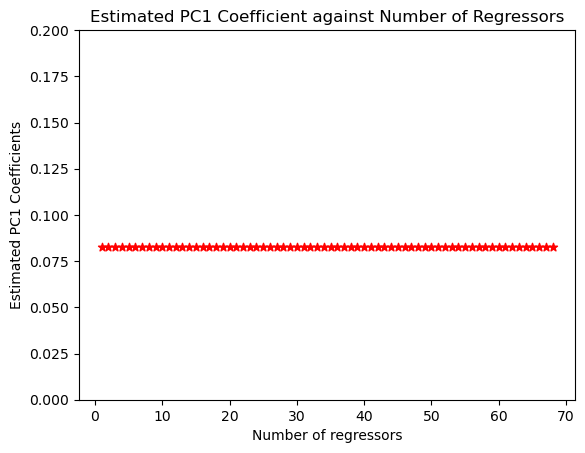

In [9]:
# TODO Plot
plt.scatter(np.linspace(1, 68, 68), PC1_coeff, marker = '*', color = 'red')
plt.ylim(0, 0.2)
plt.xlabel('Number of regressors')
plt.ylabel('Estimated PC1 Coefficients')
plt.title("Estimated PC1 Coefficient against Number of Regressors")
plt.show()

# 3 Correlation Matrix and Discussion on Coefficients

(a) [1 pt] Compute matrix $\texttt{cor\_mat}$, where entry $\texttt{cor\_mat[i,j]}$ represents the correlation between principal component i and principal component j. You may use the function np.corrcoef(). 

_(Done for you) Print $\texttt{np.round(cor\_mat,3)}$, the (rounded) correlation matrix of all the principal components (PCs). We know this matrix is 68 by 68, but the graders don't have to see the full matrix, just show us the default way that python displays. We have written this code for you._

In [12]:
# TODO compute correlation matrix
covpc = projection.T @ projection / (projection.shape[0] - 1)
cor_mat = covpc / np.outer(projection.std(axis=0), projection.std(axis=0))
# np.round(cor_mat, 3) # done for you

print(np.round(cor_mat, 3))
corr_mat = np.corrcoef(projection)
print(corr_mat)
print(np.round(cor_mat, 3))

[[ 1.001 -0.    -0.    ...  0.     0.    -0.   ]
 [-0.     1.001 -0.    ... -0.     0.     0.   ]
 [-0.    -0.     1.001 ...  0.    -0.    -0.   ]
 ...
 [ 0.    -0.     0.    ...  1.001 -0.    -0.   ]
 [ 0.     0.    -0.    ... -0.     1.001  0.   ]
 [-0.     0.    -0.    ... -0.     0.     1.001]]
[[ 1.          0.088788    0.20664318 ...  0.08187191  0.36032814
  -0.05898642]
 [ 0.088788    1.         -0.15849954 ... -0.42005266 -0.06488461
  -0.48079037]
 [ 0.20664318 -0.15849954  1.         ...  0.09828995 -0.0808171
   0.03763248]
 ...
 [ 0.08187191 -0.42005266  0.09828995 ...  1.          0.26635945
   0.32595699]
 [ 0.36032814 -0.06488461 -0.0808171  ...  0.26635945  1.
   0.14103572]
 [-0.05898642 -0.48079037  0.03763248 ...  0.32595699  0.14103572
   1.        ]]


**(b) [1 pt] Which matrix does it closely resemble to?**

Answer: It resembles to a identity matrix of dimension number of features * number of features (ie 68 * 68). 

**(c) [1 pt] Which feature of the principal components is depicted through this matrix?**

Answer: Principal components are eigenvectors of the covariance matrix, so they are orthogonal to each other. Hence, the correlation between any two principal components is 0 and is 1 with respect to itself, as is reflected in the matrix. 

**(d) [1 pt] What do you observe in the "estimated coefficients of F1" when the number of regressors are increased, compared to the "estimated coefficients of PC1" when the number of regressors are increased?**

Answer: F1 is fluctuating with a tendency of inreasing as the number of regressors increase, but PC1 is constant for all number of regressors. 

**(e) [1 pt] Explain the reason behind the observation you made in part (d) for "estimated coefficients of PC1". (You do not have to provide a rigorous explanation, just make a simple connection between part (c) and part (d). )**

Answer: Since all PCs are orthogonal and uncorrelated with each other (from part c), more number of regressors induced PCs do not affect the predicting ability of PC1, which is indicated by its constant coefficient (from part d); while Fs are on the contrary since they are correlated. So later Fn can be rewritten in the form of previous Fs, changing and updating the obtained coefficients for different trials. PCs do not have this issue since uncorrelatedness guarantees there is no way to rewrite the expression, keeping coefficients invariable. 